In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
from rich import print

In [3]:
import time

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import dill as pickle

### import the Classifier

In [4]:
from neural_network import Classifier

### load the mnist training data CSV file into a list

In [5]:
# training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

### create neural network

In [6]:
# set number of input, hidden and output nodes
input_nodes, hidden_nodes, output_nodes = 784, 200, 10

# set learning rate
# learning_rate = 0.3
learning_rate = 0.1

# create instance of neural network
n = Classifier(input_nodes, hidden_nodes, output_nodes, learning_rate)

### set training epoch

In [7]:
# epochs is the number of times the training data set is used for training

epochs = 1
# epochs = 5

### train the neural network

In [8]:
%%time

start = time.perf_counter()
for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets, print_counter=True)
print(f'The training takes {time.perf_counter()-start} seconds.')

counter =  10000

counter =  20000

counter =  30000

counter =  40000

counter =  50000

counter =  60000

The training takes 15.746203915999999 seconds.

CPU times: user 15.3 s, sys: 1.74 s, total: 17 s
Wall time: 15.7 s


### plot classifier error

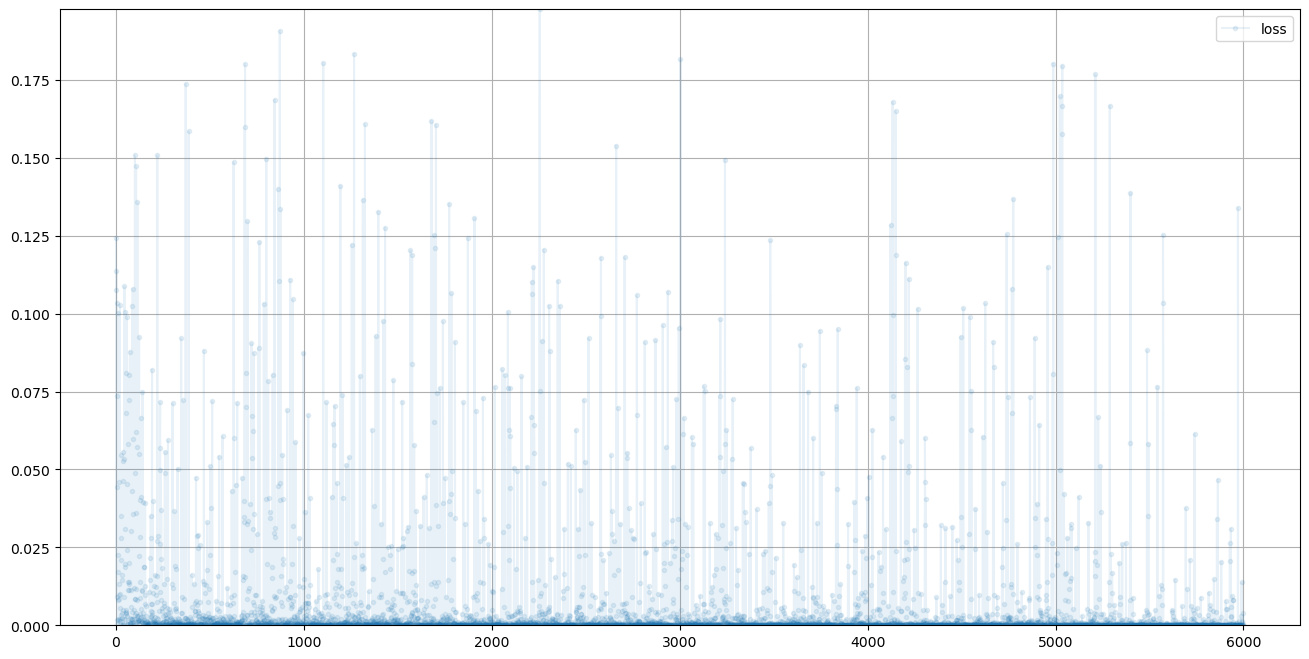

In [9]:
n.plot_progress()

### load the mnist test data CSV file into a list

In [10]:
# test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

### test the neural network

In [11]:
# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])  # correct answer is first value
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() / scorecard_array.size
print(f"{performance = }")

performance = 0.9599

### pickle and save the trainded classifier

In [12]:
n.performance = performance
n.epochs = epochs

filename = f"classifier_{hidden_nodes}_{learning_rate}_{epochs}.pkl"
n.pickle(filename)

### unpickle from saved classifier

In [13]:
with open(filename, 'rb') as f:
    nn = pickle.load(f)

In [14]:
list(nn.__dict__.keys())


[
    'inodes',
    'hnodes',
    'onodes',
    'wih',
    'who',
    'lr',
    'activation_function',
    'inverse_activation_function',
    'query',
    'counter',
    'progress',
    'performance',
    'epochs'
]

### plot classifier error

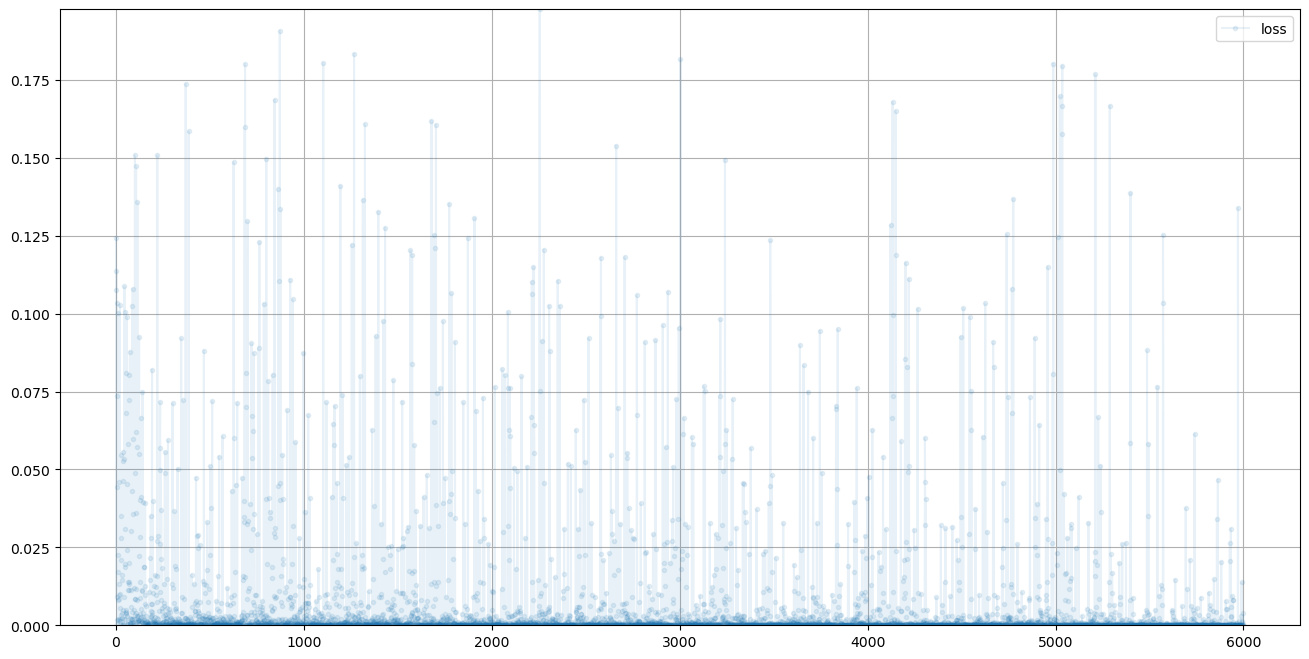

In [15]:
nn.plot_progress()

### test pickle 

label = 6

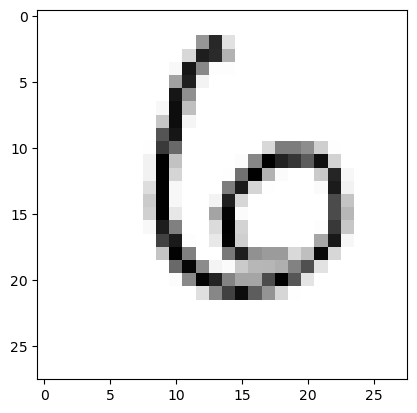

In [16]:
card = 100
all_values = test_data_list[card].split(',')
label = int(all_values[0])
print(f"{label = }")

inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None');

In [17]:
nn.query(inputs).argmax()

6